In [1]:
#!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/20201.ai4eng/master/init.py
import init; init.init(force_download=False); init.get_weblink()

endpoint https://m5knaekxo6.execute-api.us-west-2.amazonaws.com/dev-v0001/rlxmooc


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# `pandas` is mostly about manipulating tables of data

see this cheat sheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf


## Pandas main object is a `DataFrame`

- can read .csv, .excel, etc.


In [238]:
!head local/data/internet_facebook.dat

In [239]:
!wc local/data/weather_data_austin_2010.csv

In [3]:
df = pd.read_csv('local/data/internet_facebook.dat', index_col='# Pais')
df

,Uso_Internet,Uso_Facebook
# Pais,,
Argentina,49.40,30.53
Australia,80.60,46.01
Belgium,67.30,36.98
Brazil,37.76,4.39
Canada,72.30,52.08
Chile,50.90,46.14
China,22.40,0.05
Colombia,38.80,25.90
Egypt,12.90,5.68


In [4]:
df.head()

,Uso_Internet,Uso_Facebook
# Pais,,
Argentina,49.40,30.53
Australia,80.60,46.01
Belgium,67.30,36.98
Brazil,37.76,4.39
Canada,72.30,52.08


In [5]:
df.tail()

,Uso_Internet,Uso_Facebook
# Pais,,
Thailand,20.50,10.29
Turkey,35.00,31.91
USA,77.33,46.98
UK,70.18,45.97
Venezuela,25.50,28.64


In [6]:
df.columns

Index(['Uso_Internet', 'Uso_Facebook'], dtype='object')

In [7]:
df.index

Index(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'China', 'Colombia', 'Egypt', 'France', 'Germany', 'Hong_Kong', 'India',
       'Indonesia', 'Italy', 'Japan', 'Malaysia', 'Mexico', 'Netherlands',
       'Peru', 'Philippines', 'Poland', 'Russia', 'Saudi_Arabia',
       'South_Africa', 'Spain', 'Sweden', 'Taiwan', 'Thailand', 'Turkey',
       'USA', 'UK', 'Venezuela'],
      dtype='object', name='# Pais')

**fix the index name**

In [8]:
df.index.name="Pais"
df.head()

,Uso_Internet,Uso_Facebook
Pais,,
Argentina,49.40,30.53
Australia,80.60,46.01
Belgium,67.30,36.98
Brazil,37.76,4.39
Canada,72.30,52.08


In [9]:
df.describe()

,Uso_Internet,Uso_Facebook
count,33.000000,33.000000
mean,46.890000,24.668182
std,24.456421,16.511662
min,7.100000,0.050000
25%,24.900000,11.650000
50%,49.400000,25.900000
75%,67.300000,37.770000
max,82.900000,52.330000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Argentina to Venezuela
Data columns (total 2 columns):
Uso_Internet    33 non-null float64
Uso_Facebook    33 non-null float64
dtypes: float64(2)
memory usage: 792.0+ bytes


**a dataframe is made of `Series`**. Observe that each series has **its own type**

In [11]:
s1 = df["Uso_Internet"]
type(s1)

pandas.core.series.Series

In [5]:
s1

# Pais
Argentina       49.40
Australia       80.60
Belgium         67.30
Brazil          37.76
Canada          72.30
Chile           50.90
China           22.40
Colombia        38.80
Egypt           12.90
France          65.70
Germany         67.00
Hong_Kong       69.50
India            7.10
Indonesia       10.50
Italy           48.80
Japan           73.80
Malaysia        62.80
Mexico          24.90
Netherlands     82.90
Peru            26.20
Philippines     21.50
Poland          52.00
Russia          27.00
Saudi_Arabia    22.70
South_Africa    10.50
Spain           66.80
Sweden          80.70
Taiwan          66.10
Thailand        20.50
Turkey          35.00
USA             77.33
UK              70.18
Venezuela       25.50
Name: Uso_Internet, dtype: float64

if the column name is not too fancy (empy spaces, accents, etc.) we can use columns names as python syntax.

In [12]:
df.Uso_Facebook

Pais
Argentina       30.53
Australia       46.01
Belgium         36.98
Brazil           4.39
Canada          52.08
Chile           46.14
China            0.05
Colombia        25.90
Egypt            5.68
France          32.91
Germany         14.07
Hong_Kong       52.33
India            1.52
Indonesia       13.49
Italy           30.62
Japan            2.00
Malaysia        37.77
Mexico          16.80
Netherlands     20.54
Peru            13.34
Philippines     19.68
Poland          11.79
Russia           2.99
Saudi_Arabia    11.65
South_Africa     7.83
Spain           30.24
Sweden          44.72
Taiwan          38.21
Thailand        10.29
Turkey          31.91
USA             46.98
UK              45.97
Venezuela       28.64
Name: Uso_Facebook, dtype: float64

## DataFrame indexing

is **NOT** exactly like numpy

- first index
    - if string refers to columns
    - if `Series` of booleans is used as a filter
    
- for selecting columns:
    - use `.loc` to select by Index
    - use `.iloc` to select by position   

In [ ]:
df["Colombia"]

In [14]:
df.loc["Colombia"]

Uso_Internet    38.8
Uso_Facebook    25.9
Name: Colombia, dtype: float64

Index semantics is exact!!

In [253]:
df.loc["Colombia":"Spain"]

In [254]:
df.iloc[10:15]

filtering

In [255]:
df[df.Uso_Internet>80]

combined conditions

In [256]:
df[(df.Uso_Internet>50)&(df.Uso_Facebook>50)]

In [257]:
df[(df.Uso_Internet>50)|(df.Uso_Facebook>50)]

## Managing data

    
    
observe csv structure:
- missing column name
- missing data 

In [115]:
!head local/data/comptagevelo2009.csv

In [3]:
d = pd.read_csv("local/data/comptagevelo2009.csv")
d

,Date,Unnamed: 1,Berri1,Maisonneuve_1,Maisonneuve_2,Brébeuf
0,01/01/2009,00:00,29,20,35,NaN
1,02/01/2009,00:00,19,3,22,NaN
2,03/01/2009,00:00,24,12,22,NaN
3,04/01/2009,00:00,24,8,15,NaN
4,05/01/2009,00:00,120,111,141,NaN
...,...,...,...,...,...,...
360,27/12/2009,00:00,66,29,52,0.0
361,28/12/2009,00:00,61,41,99,0.0
362,29/12/2009,00:00,89,52,115,0.0
363,30/12/2009,00:00,76,43,115,0.0


In [4]:
d.columns, d.shape


(Index(['Date', 'Unnamed: 1', 'Berri1', 'Maisonneuve_1', 'Maisonneuve_2',
        'Brébeuf'],
       dtype='object'), (365, 6))

numerical features

In [5]:
d.describe()

,Berri1,Maisonneuve_1,Maisonneuve_2,Brébeuf
count,365.000000,365.000000,365.000000,178.000000
mean,2032.200000,1060.252055,2093.169863,2576.359551
std,1878.879799,1079.533086,1854.368523,2484.004743
min,0.000000,0.000000,0.000000,0.000000
25%,194.000000,90.000000,228.000000,0.000000
50%,1726.000000,678.000000,1686.000000,1443.500000
75%,3540.000000,1882.000000,3520.000000,4638.000000
max,6626.000000,4242.000000,6587.000000,7575.000000


In [6]:
d["Berri1"].head()

0     29
1     19
2     24
3     24
4    120
Name: Berri1, dtype: int64

In [7]:
d["Unnamed: 1"].unique()


array(['00:00'], dtype=object)

In [8]:
d["Berri1"].unique()


array([  29,   19,   24,  120,  261,   60,   35,   81,  318,  105,  168,
        145,  131,   93,   25,   52,  136,  147,  109,  172,  148,   15,
        209,   92,  110,   14,  158,  179,  122,   95,  185,   82,  190,
        228,  306,  188,   98,  139,  258,  304,  326,  134,  125,   96,
         65,  123,  129,  154,  239,  198,   32,   67,  157,  164,  300,
        176,  195,  310,    7,  366,  234,  132,  203,  298,  541,  525,
        871,  592,  455,  446,  441,  266,  189,  343,  292,  355,  245,
          0,  445, 1286, 1178, 2131, 2709,  752, 1886, 2069, 3132, 3668,
       1368, 4051, 2286, 3519, 3520, 1925, 2125, 2662, 4403, 4338, 2757,
        970, 2767, 1493,  728, 3982, 4742, 5278, 2344, 4094,  784, 1048,
       2442, 3686, 3042, 5728, 3815, 3540, 4775, 4434, 4363, 2075, 2338,
       1387, 2063, 2031, 3274, 4325, 5430, 6028, 3876, 2742, 4973, 1125,
       3460, 4449, 3576, 4027, 4313, 3182, 5668, 6320, 2397, 2857, 2590,
       3234, 5138, 5799, 4911, 4333, 3680, 1536, 30

In [9]:
d["Berri1"].dtype, d["Date"].dtype, d["Unnamed: 1"].dtype


(dtype('int64'), dtype('O'), dtype('O'))

In [10]:
d.index


RangeIndex(start=0, stop=365, step=1)

## Fixing data

observe we set one column as the index one, and we **convert** it to date object type

In [11]:
d.Date

0      01/01/2009
1      02/01/2009
2      03/01/2009
3      04/01/2009
4      05/01/2009
          ...    
360    27/12/2009
361    28/12/2009
362    29/12/2009
363    30/12/2009
364    31/12/2009
Name: Date, Length: 365, dtype: object

In [12]:
d.index = pd.to_datetime(d.Date)
del(d["Date"])
del(d["Unnamed: 1"])
d.head()

,Berri1,Maisonneuve_1,Maisonneuve_2,Brébeuf
Date,,,,
2009-01-01,29,20,35,NaN
2009-02-01,19,3,22,NaN
2009-03-01,24,12,22,NaN
2009-04-01,24,8,15,NaN
2009-05-01,120,111,141,NaN


In [13]:
d.index

DatetimeIndex(['2009-01-01', '2009-02-01', '2009-03-01', '2009-04-01',
               '2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01',
               '2009-09-01', '2009-10-01',
               ...
               '2009-12-22', '2009-12-23', '2009-12-24', '2009-12-25',
               '2009-12-26', '2009-12-27', '2009-12-28', '2009-12-29',
               '2009-12-30', '2009-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

let's fix columns names

In [14]:
d.columns=["Berri", "Mneuve1", "Mneuve2", "Brebeuf"]
d.head()

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01,29,20,35,NaN
2009-02-01,19,3,22,NaN
2009-03-01,24,12,22,NaN
2009-04-01,24,8,15,NaN
2009-05-01,120,111,141,NaN


In [15]:
for col in d.columns:
    print (col, np.sum(pd.isnull(d[col])))

Berri 0
Mneuve1 0
Mneuve2 0
Brebeuf 187


In [16]:
d.shape

(365, 4)

In [17]:
d['Brebeuf'].describe()

count     178.000000
mean     2576.359551
std      2484.004743
min         0.000000
25%         0.000000
50%      1443.500000
75%      4638.000000
max      7575.000000
Name: Brebeuf, dtype: float64

C:\Users\Kevin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Kevin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


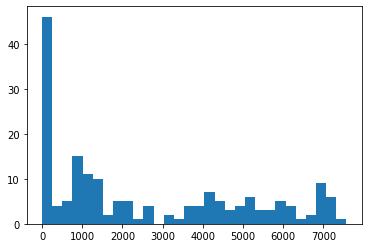

In [18]:
plt.hist(d.Brebeuf, bins=30);

**fix missing**!!!

In [19]:
d.Brebeuf.fillna(d.Brebeuf.mean(), inplace=True)


In [20]:
d['Brebeuf'].describe()

count     365.000000
mean     2576.359551
std      1732.161423
min         0.000000
25%      1588.000000
50%      2576.359551
75%      2576.359551
max      7575.000000
Name: Brebeuf, dtype: float64

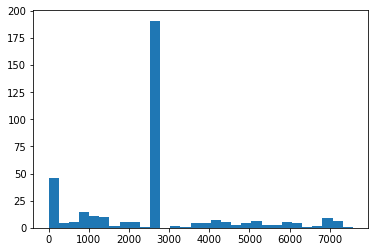

In [21]:
plt.hist(d.Brebeuf, bins=30);

In [22]:
d

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01,29,20,35,2576.359551
2009-02-01,19,3,22,2576.359551
2009-03-01,24,12,22,2576.359551
2009-04-01,24,8,15,2576.359551
2009-05-01,120,111,141,2576.359551
...,...,...,...,...
2009-12-27,66,29,52,0.000000
2009-12-28,61,41,99,0.000000
2009-12-29,89,52,115,0.000000


let's make sure it is sorted

In [23]:
d.sort_index(inplace=True)
d.head()

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01,29,20,35,2576.359551
2009-01-02,14,2,2,2576.359551
2009-01-03,67,30,80,2576.359551
2009-01-04,0,0,0,2576.359551
2009-01-05,1925,1256,1501,2576.359551


## Filtering

In [24]:
d[d.Berri>6000]


,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-05-06,6028,4120,4223,2576.359551
2009-06-17,6320,3388,6047,2576.359551
2009-07-15,6100,3767,5536,6939.000000
2009-09-07,6626,4227,5751,7575.000000
2009-10-07,6274,4242,5435,7268.000000


In [25]:
d[(d.Berri>6000) & (d.Brebeuf<7000)]


,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-05-06,6028,4120,4223,2576.359551
2009-06-17,6320,3388,6047,2576.359551
2009-07-15,6100,3767,5536,6939.000000


## Locating

In [26]:
d[d.Berri>5500].sort_index(axis=0)


,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-03-08,5904,3102,4853,7194.000000
2009-05-06,6028,4120,4223,2576.359551
2009-05-08,5611,2646,5201,7121.000000
2009-05-21,5728,3693,5397,2576.359551
2009-06-16,5668,3499,5609,2576.359551
2009-06-17,6320,3388,6047,2576.359551
2009-06-23,5799,3114,5386,2576.359551
2009-07-15,6100,3767,5536,6939.000000
2009-07-20,5607,3825,5092,7064.000000


In [27]:
d.iloc[100:110]


,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-04-11,1974,1113,2693,1046.000000
2009-04-12,1108,595,1472,0.000000
2009-04-13,0,0,0,2576.359551
2009-04-14,0,0,0,2576.359551
2009-04-15,0,0,0,2576.359551
2009-04-16,0,0,0,2576.359551
2009-04-17,1286,820,1436,2576.359551
2009-04-18,1178,667,826,2576.359551
2009-04-19,2131,1155,1426,2576.359551


**dates as INDEX have special semantics**

In [28]:
d.loc["2009-10-01":"2009-10-10"]


,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-10-01,81,45,79,2576.359551
2009-10-02,228,101,260,2576.359551
2009-10-03,366,203,354,2576.359551
2009-10-04,0,0,0,2576.359551
2009-10-05,728,362,523,2576.359551
2009-10-06,3460,2354,3978,2576.359551
2009-10-07,6274,4242,5435,7268.000000
2009-10-08,2999,1545,3185,4187.000000
2009-10-09,5496,2921,6587,6520.000000


can do sorting across any criteria

In [29]:
d.sort_values(by="Berri").head()


,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-07-04,0,0,0,2576.359551
2009-03-30,0,0,0,2576.359551
2009-04-04,0,0,0,2576.359551
2009-04-13,0,0,0,2576.359551
2009-04-14,0,0,0,2576.359551


and chain operations

In [30]:
d.sort_values(by="Berri").loc["2009-10-01":"2009-10-10"]


,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-10-04,0,0,0,2576.359551
2009-10-01,81,45,79,2576.359551
2009-10-02,228,101,260,2576.359551
2009-10-03,366,203,354,2576.359551
2009-10-05,728,362,523,2576.359551
2009-10-10,1407,725,1443,1003.000000
2009-10-08,2999,1545,3185,4187.000000
2009-10-06,3460,2354,3978,2576.359551
2009-10-09,5496,2921,6587,6520.000000


# Time series operations

In [31]:
d.rolling(3).mean().head(10)


,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01,NaN,NaN,NaN,NaN
2009-01-02,NaN,NaN,NaN,NaN
2009-01-03,36.666667,17.333333,39.000000,2576.359551
2009-01-04,27.000000,10.666667,27.333333,2576.359551
2009-01-05,664.000000,428.666667,527.000000,2576.359551
2009-01-06,1733.000000,1116.333333,1409.000000,2576.359551
2009-01-07,3223.333333,1862.666667,2426.000000,2576.359551
2009-01-08,2602.666667,1795.000000,3042.666667,3673.906367
2009-01-09,3277.333333,2029.333333,4055.666667,5128.119850


In [32]:
d.index = d.index + pd.Timedelta("5m")
d.head()

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01 00:05:00,29,20,35,2576.359551
2009-01-02 00:05:00,14,2,2,2576.359551
2009-01-03 00:05:00,67,30,80,2576.359551
2009-01-04 00:05:00,0,0,0,2576.359551
2009-01-05 00:05:00,1925,1256,1501,2576.359551


In [33]:
d.shift(freq=pd.Timedelta(days=365)).head()


,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2010-01-01 00:05:00,29,20,35,2576.359551
2010-01-02 00:05:00,14,2,2,2576.359551
2010-01-03 00:05:00,67,30,80,2576.359551
2010-01-04 00:05:00,0,0,0,2576.359551
2010-01-05 00:05:00,1925,1256,1501,2576.359551


## Downsampling

In [155]:
d.resample(pd.Timedelta("2d")).first().head()


In [156]:
d.resample(pd.Timedelta("2d")).mean().head()


## Upsampling

In [157]:
d.resample(pd.Timedelta("12h")).first().head()


In [158]:
d.resample(pd.Timedelta("12h")).fillna(method="pad").head()


## Building Dataframes from other structures

In [160]:

a = np.random.randint(10,size=(20,5))
a

In [161]:
k = pd.DataFrame(a, columns=["uno", "dos", "tres", "cuatro", "cinco"], index=range(10,10+len(a)))
k

## `.values` access the underlying `numpy` structure

In [34]:
d.values

array([[2.90000000e+01, 2.00000000e+01, 3.50000000e+01, 2.57635955e+03],
       [1.40000000e+01, 2.00000000e+00, 2.00000000e+00, 2.57635955e+03],
       [6.70000000e+01, 3.00000000e+01, 8.00000000e+01, 2.57635955e+03],
       ...,
       [8.90000000e+01, 5.20000000e+01, 1.15000000e+02, 0.00000000e+00],
       [7.60000000e+01, 4.30000000e+01, 1.15000000e+02, 0.00000000e+00],
       [5.30000000e+01, 4.60000000e+01, 1.12000000e+02, 0.00000000e+00]])

## some out-of-the-box plotting

but recall that we always can do custom plotting

In [163]:
d.plot(figsize=(15,3))


In [165]:
plt.figure(figsize=(15,3))
plt.plot(d.Berri)

In [166]:
d.Berri.cumsum().plot()


In [167]:
plt.scatter(d.Berri, d.Brebeuf)


In [168]:
pd.plotting.scatter_matrix(d, figsize=(10,10));

## Grouping

In [169]:

d["month"] = [i.month for i in d.index]
d.head()

In [170]:
d.groupby("month").max()


In [171]:
d.groupby("month").count()


## Time series

observe we can **establish at load time** many thing if the dataset is relatively clean

In [179]:

tiempo=pd.read_csv('local/data/weather_data_austin_2010.csv',parse_dates=['Date'], dayfirst=True ,index_col='Date')
tiempo

In [178]:
tiempo.loc['2010-08-01':'2010-10-30']


In [181]:
tiempo.loc['2010-06'].head()


In [182]:
tiempo.sample(10)


In [183]:
tiempo.sample(frac=0.01)


## Resampling

In [184]:
tiempo.head()


In [185]:
tiempo.resample("5d").mean().head()

In [186]:
tiempo.resample("5d").mean().head()


In [187]:
tiempo.resample("5d").mean().head()


In [191]:
tiempo.resample("30min").mean()[:15]


In [192]:

subt=tiempo.between_time(start_time='1:00',end_time='12:00')
subt

In [193]:
tiempo.index.weekday


In [195]:
tiempo.index.month


In [196]:
tiempo.index.day


In [197]:
tiempo.plot(style='.')


In [201]:
tiempo['2010-01'].plot()

In [202]:
tiempo['2010-01-04'].plot()

## Rolling operations

In [215]:
import pandas as pd
### permite obtener data frames directamente de internet
!pip install yfinance

In [217]:
import yfinance as yf


In [220]:
#define the ticker symbol
tickerSymbol = 'MSFT'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
gs = tickerData.history(period='1d', start='2010-1-1', end='2020-1-25')

#see your data
gs

In [224]:
gs.Close.rolling(10).mean().head(20)


In [232]:
plt.figure(figsize=(20,3))
plt.plot(gs.Close)
plt.plot(gs.Close.rolling(50).mean())


In [233]:
plt.figure(figsize=(20,3))
plt.plot(gs.iloc[:400].Close, label="original")
plt.plot(gs.iloc[:400].Close.rolling(50).mean(), label="rolling")
plt.plot(gs.iloc[:400].Close.rolling(50, center=True).mean(), label="center")
plt.legend();

In [236]:
plt.figure(figsize=(20,3))
plt.plot(gs.iloc[:400].Close.rolling(10).mean())
